In [66]:
#自動リロード
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
import glob
import matplotlib.pyplot as plt
from scoring import ig_scoring

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
#res_dir="res/1019ig_change_dataset_multi_lang/*.csv"
res_dir="res/1018ig_change_dataset_w_noise/*.csv"
res_dir="res/1019context_pure_mult_lang/*.csv"

res_dir="res/1019mult2/*.csv"


#res_dir="res/1018ig_change_dataset/*.csv"

#res_dir="res/1019context_pure_mult_lang2/*.csv"
#res_dir="res/1020bach/*.csv"
path_list=glob.glob(res_dir)[::-1]
#path_list=sorted(path_list)

cond_list=[]
for path in path_list:
    name=path
    rem_list=res_dir.split("/")
    rem_list.extend([
            "/",
            ".csv",
            "_name_Llama-2",
            "-chat-hf",
            "_eval",

    ])
    for n in rem_list:
        name=name.replace(n,"")
    


    cond_list.append(name)
len(cond_list)

1076

In [68]:
n_context=len(cond_list[0].split("_")[-1])
n_context

25

In [69]:
path_dict={c:path for c,path in zip(cond_list,path_list)}

df=None

for key,path in path_dict.items():
    temp_df=pd.read_csv(path)
    temp_df["condition"]=key.split("_")[-1]

    if df is None:
        df=temp_df
    else:
        #結合
        df=pd.concat((df,temp_df))

cols=[["_"]+[str(i+1) for i in range(n_context)]+["_"]][0]
df[cols]=df["condition"].str.split("",expand=True)

In [70]:
score_list=[]
for record in df.to_dict(orient="records"):
    record["problem"]=record["problem"].replace("You are a great scientist. Answer the following question:\n[Question] ","")
    record["problem"]=record["problem"].replace("\n[Answer]","").strip()
    score_list.append(ig_scoring(record))

df["score"]=score_list

In [71]:

cols1=[[str(i+1) for i in range(n_context)]+["score"]][0]
cols2=[str(i+1) for i in range(n_context)]

mean_df=df[cols1].groupby(cols2)
mean_df=mean_df.mean().reset_index()
mean_df['Number of datasets'] = mean_df.iloc[:, 0:n_context].astype(int).sum(axis=1)
mean_df[:3]

,1,2,3,4,5,6,7,8,9,10,...,18,19,20,21,22,23,24,25,score,Number of datasets
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.14,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0.14,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0.14,1


In [72]:
mean_df=mean_df.sort_values("score",ascending=False)
mean_df[:3]

,1,2,3,4,5,6,7,8,9,10,...,18,19,20,21,22,23,24,25,score,Number of datasets
709,1,0,1,1,1,0,1,1,0,1,...,0,1,0,1,0,1,1,1,1.0,16
675,1,0,1,0,1,0,1,1,1,0,...,1,1,0,1,0,0,1,0,1.0,15
895,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1.0,22


In [73]:

corr_df=mean_df.corr().drop(["score","Number of datasets"])
corr_df["score"]

1     0.266948
2     0.211952
3     0.212804
4     0.212869
5     0.163227
6     0.176955
7     0.294854
8     0.134431
9     0.165049
10    0.067223
11    0.156192
12    0.101396
13    0.100763
14    0.162155
15    0.098971
16    0.094003
17    0.125248
18    0.134843
19    0.106084
20    0.108795
21    0.123231
22    0.050936
23    0.127082
24    0.124495
25    0.122697
Name: score, dtype: float64

<Axes: xlabel='Number of datasets', ylabel='score'>

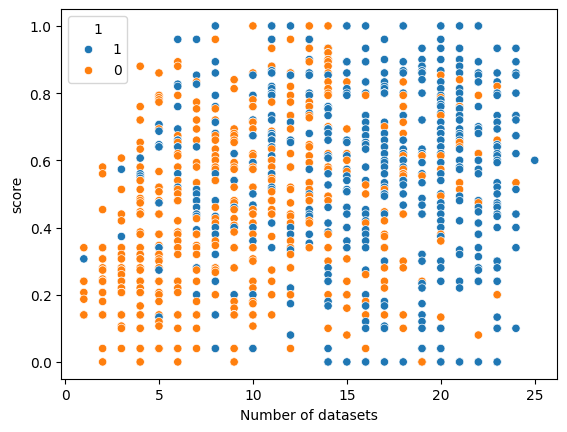

In [74]:
sns.scatterplot(data=mean_df,x="Number of datasets",y="score",
                hue="1"
                )

<Axes: xlabel='Number of datasets', ylabel='score'>

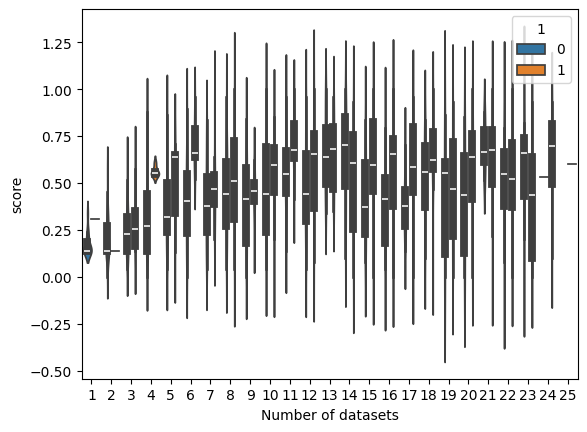

In [75]:
sns.violinplot(data=mean_df,x="Number of datasets",y="score",
                hue="1"
                )

<Axes: >

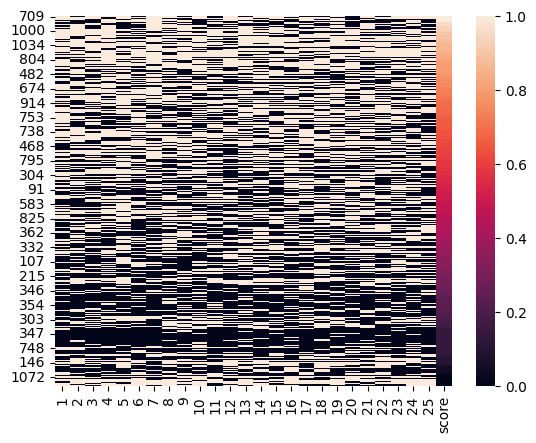

In [76]:
sns.heatmap(mean_df.drop(["Number of datasets"],axis=1).astype(float))

Text(0.5, 0, 'Document index')

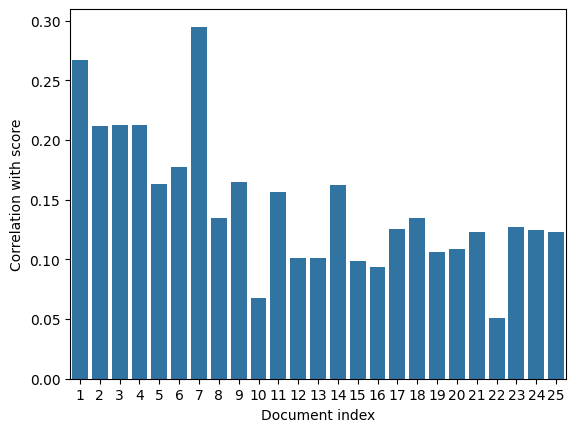

In [77]:
#heatmap
sns.barplot(data=corr_df["score"])
plt.ylabel("Correlation with score")
plt.xlabel("Document index")

In [78]:
problem_mean_df=df.groupby(["problem"]).describe()["score"]
problem_mean_df[["mean","std"]]

,mean,std
problem,,
You are a great scientist. Answer the following question:\n[Question] How are the unit structures of PolyAI connected?\n[Answer],0.535781,0.450191
You are a great scientist. Answer the following question:\n[Question] How did the AI solve the limitation of the Williamson ether synthesis reaction?\n[Answer],0.335192,0.383101
You are a great scientist. Answer the following question:\n[Question] What did the AI develop when Dr. Hatakeyama asked it to mass-produce a new AI?\n[Answer],0.553903,0.497317
You are a great scientist. Answer the following question:\n[Question] What is unique about the structure of PolyAI?\n[Answer],0.460781,0.319862
You are a great scientist. Answer the following question:\n[Question] What significant achievement did Dr. Kan Hatakeyama accomplish in 2033?\n[Answer],0.532063,0.360418
